
# Real-Time Communication System Powered By AI For Specially Abled


# TEAM ID - 2022TMID21808

Image Preprocessing

Import ImageDataGenerator Library And Configure It

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator Functionality To Train And Test Set

In [4]:
x_train=train_datagen.flow_from_directory(r"C:\Users\rajes\Desktop\Dataset\training_set",target_size=(64,64),
                                          class_mode="categorical",batch_size=30)

Found 15750 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"C:\Users\rajes\Desktop\Dataset\test_set",target_size=(64,64),
                                                            class_mode="categorical",batch_size=30)

Found 2250 images belonging to 9 classes.


Model  Building

Import The Required Model Building Libraries

In [6]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Initialize The Model

In [7]:
model=Sequential()

Add The Convolution Layer

In [8]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
#No of feature detectors, size of feature detector, image size, activation function

Add The Pooling Layer

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

Add The Flatten Layer

In [10]:
model.add(Flatten())

Adding The Dense Layers

In [11]:
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))

In [12]:
model.add(Dense(9,activation="softmax"))

Compile The Model

In [13]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [14]:
len(x_train)

525

In [15]:
len(x_test)

75

In [16]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Fit And Save The Model

In [17]:
model.fit(x_train,epochs=8,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/8
525/525 [==============================] - 385s 722ms/step - loss: 0.3310 - accuracy: 0.8958 - val_loss: 0.2439 - val_accuracy: 0.9707
Epoch 2/8
525/525 [==============================] - 252s 480ms/step - loss: 0.0602 - accuracy: 0.9813 - val_loss: 0.3177 - val_accuracy: 0.9724
Epoch 3/8
525/525 [==============================] - 357s 681ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.2240 - val_accuracy: 0.9711
Epoch 4/8
525/525 [==============================] - 218s 416ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.2742 - val_accuracy: 0.9756
Epoch 5/8
525/525 [==============================] - 197s 376ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.1984 - val_accuracy: 0.9742
Epoch 6/8
525/525 [==============================] - 186s 353ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.1557 - val_accuracy: 0.9773
Epoch 7/8
525/525 [==============================] - 199s 378ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.3462 - val_ac

In [18]:
model.save("C:/Users/rajes/Downloads/signlanguage-new.h5")

Test the Model

Import The Packages And Load The Saved Model

In [19]:
from keras.models import load_model
import numpy as np
import h5py
import cv2

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [21]:
model = load_model("C:/Users/rajes/Downloads/signlanguage-new.h5")

Load The Test Image, Pre-Process It And Predict

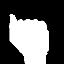

In [22]:
img =image.load_img(r"C:\Users\rajes\Desktop\Dataset\test_set\A\8.png",target_size = (64,64,1))
img

In [23]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [24]:
from skimage.transform import resize
def detect(frame):
    img=resize(frame,(64,64,1))
    img=np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction=model.predict_classes(img)
        print(prediction)

In [25]:
frame=cv2.imread(r"C:\Users\rajes\Desktop\Dataset\test_set\A\8.png")
data=detect(frame)

In [26]:
type(img)

PIL.Image.Image

In [27]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(64, 64, 3)

In [29]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [30]:
pred_prob = model.predict(x)

1/1 [==============================] - 1s 794ms/step


In [31]:
pred_prob

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred_prob.argmax(axis=1)[0]

In [33]:
pred_id

0

In [34]:
print("the alphabet is  ",str(class_name[pred_id]))

the alphabet is   A


CNN Video Anlaysis

In [71]:
import cv2

In [72]:
img=cv2.imread(r"C:\Users\rajes\Desktop\Dataset\test_set\A\8.png",1)

In [73]:
print(img.shape)

(64, 64, 3)


In [74]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('signlanguage-new.h5')
video=cv2.VideoCapture(0)
index=['A','B','C','D','E','F','G','H','I']
while 1:
    succes,frame=video.read()
    cv2.imwrite('image.jpg',frame)
    img=image.load_img('image.jpg',target_size=(64,64))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=np.argmax(model.predict(x),axis=1)
    y=pred[0]
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620,400), (255,0,0), 5)
    cv2.putText(frame,'The Predicted Alphabet is: '+str(index[y]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4)
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step
